In [1]:
import random # for random value
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting 
from PIL import Image # Image processing
import json  #json file I/O
#from mpl_toolkits.basemap import Basemap

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

In [3]:
from pathlib import Path
from skimage.io import imread
from skimage.color import rgb2gray

In [4]:
#set up too see all contents
#reference: https://stackoverflow.com/questions/60013721/how-to-see-complete-rows-in-google-colab
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


import and process data

In [5]:
#Data directory
ac = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\AnnualCrop")
df1 = pd.DataFrame({'path': list(ac.glob('**/*.jp*g'))})

fo = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\Forest")
df2 = pd.DataFrame({'path': list(fo.glob('**/*.jp*g'))})

hv = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\HerbaceousVegetation")
df3 = pd.DataFrame({'path': list(hv.glob('**/*.jp*g'))})

hw = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\Highway")
df4 = pd.DataFrame({'path': list(hw.glob('**/*.jp*g'))})

ind = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\Industrial")
df5 = pd.DataFrame({'path': list(ind.glob('**/*.jp*g'))})

pas = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\Pasture")
df6 = pd.DataFrame({'path': list(pas.glob('**/*.jp*g'))})

pc = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\PermanentCrop")
df7 = pd.DataFrame({'path': list(pc.glob('**/*.jp*g'))})

res = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\Residential")
df8 = pd.DataFrame({'path': list(res.glob('**/*.jp*g'))})

riv = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\River")
df9 = pd.DataFrame({'path': list(riv.glob('**/*.jp*g'))})

sl = Path(r"C:\资料\MUSA650\Final\EuroSAT\2750\SeaLake")
df10 = pd.DataFrame({'path': list(sl.glob('**/*.jp*g'))})

In [6]:
df9.head()

,path
0,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_1.jpg
1,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_10.jpg
2,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_100.jpg
3,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_1000.jpg
4,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_1001.jpg


In [7]:
#Size of image
img1 = np.asarray(imread(df1.path[0]))
img1.shape

(64, 64, 3)

In [8]:
#make labels and categories
df1["category"] = "AnnualCrop"
df1["label"] = 0

df2["category"] = "Forest"
df2["label"] = 1

df3["category"] = "HerbaceousVegetation"
df3["label"] = 2

df4["category"] = "Highway"
df4["label"] = 3

df5["category"] = "Industrial"
df5["label"] = 4

df6["category"] = "Pasture"
df6["label"] = 5

df7["category"] = "PermanentCrop"
df7["label"] = 6

df8["category"] = "Residential"
df8["label"] = 7

df9["category"] = "River"
df9["label"] = 8

df10["category"] = "SeaLake"
df10["label"] = 9

In [9]:
df9.head()

,path,category,label
0,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_1.jpg,River,8
1,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_10.jpg,River,8
2,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_100.jpg,River,8
3,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_1000.jpg,River,8
4,C:\资料\MUSA650\Final\EuroSAT\2750\River\River_1001.jpg,River,8


In [10]:
#combine the dataset
EuroSAT = pd.DataFrame().append([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [11]:
len(EuroSAT)

27000

In [12]:
X_data = EuroSAT["path"]
y_data = EuroSAT["label"].values

In [13]:
#Split the data into training (50%) and testing sets (50%)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, train_size=0.5, random_state=42)

In [14]:
X_train.shape

(13500,)

In [15]:
y_train.shape

(13500,)

Convert Data to matrix

In [16]:
#Read all images in the training dataset and convert the data into matrix

#get the shape of image
img1 = imread(df1.path[0])
img1_gray = rgb2gray(img1)
img1_vec = img1_gray.flatten()

dvec = img1_vec.shape[0]

n = X_train.shape[0]

mat_1D_train = np.zeros([n, dvec])

#loop
for i, tmpPath in enumerate(X_train.values):
    img_rgb_All = imread(tmpPath)
    img_gray_All = rgb2gray(img_rgb_All)
    img_vec_All = img_gray_All.flatten()
    mat_1D_train[i, :] = img_vec_All


In [17]:
mat_1D_train.shape

(13500, 4096)

In [18]:
#Read all images in the training dataset and convert the data into matrix

#get the shape of image
img1 = imread(df1.path[0])
img1_gray = rgb2gray(img1)
img1_vec = img1_gray.flatten()

dvec = img1_vec.shape[0]

n = X_test.shape[0]

mat_1D_test = np.zeros([n, dvec])

#loop
for i, tmpPath in enumerate(X_test.values):
    img_rgb_All = imread(tmpPath)
    img_gray_All = rgb2gray(img_rgb_All)
    img_vec_All = img_gray_All.flatten()
    mat_1D_test[i, :] = img_vec_All


In [19]:
mat_1D_test.shape

(13500, 4096)

Fully Connected Architecture

<br>

reference:https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5

In [20]:
model = Sequential()

model.add(Dense(256, input_dim=64*64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 1,151,978
Trainable params: 1,151,978
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
mat_1D_train.shape

(13500, 4096)

In [24]:
from keras.utils import to_categorical

y_train_labels = to_categorical(y_train)

In [25]:
y_test_labels = to_categorical(y_test)

In [26]:
y_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [27]:
y_train_labels.shape

(13500, 10)

In [28]:
# training
model.fit(
    mat_1D_train, 
    y_train_labels,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/18
338/338 - 3s - loss: 2.3145 - accuracy: 0.1088 - val_loss: 2.2968 - val_accuracy: 0.1081
Epoch 2/18
338/338 - 3s - loss: 2.2967 - accuracy: 0.1122 - val_loss: 2.2946 - val_accuracy: 0.1081
Epoch 3/18
338/338 - 3s - loss: 2.2958 - accuracy: 0.1121 - val_loss: 2.2938 - val_accuracy: 0.1144
Epoch 4/18
338/338 - 3s - loss: 2.2955 - accuracy: 0.1113 - val_loss: 2.2935 - val_accuracy: 0.1081
Epoch 5/18
338/338 - 3s - loss: 2.2954 - accuracy: 0.1133 - val_loss: 2.2933 - val_accuracy: 0.1081
Epoch 6/18
338/338 - 3s - loss: 2.2953 - accuracy: 0.1138 - val_loss: 2.2933 - val_accuracy: 0.1081
Epoch 7/18
338/338 - 3s - loss: 2.2954 - accuracy: 0.1138 - val_loss: 2.2932 - val_accuracy: 0.1081
Epoch 8/18
338/338 - 3s - loss: 2.2953 - accuracy: 0.1117 - val_loss: 2.2931 - val_accuracy: 0.1081
Epoch 9/18
338/338 - 3s - loss: 2.2954 - accuracy: 0.1134 - val_loss: 2.2931 - val_accuracy: 0.1081
Epoch 10/18
338/338 - 3s - loss: 2.2954 - accuracy: 0.1120 - val_loss: 2.2931 - val_accuracy: 0.1081

In [30]:
history = model.fit(
    mat_1D_train, y_train_labels,
    validation_data=(mat_1D_test, y_test_labels),
    batch_size=32,
    epochs=18,
    verbose=0,  # turn off training log
)


Text(0.5, 1.0, 'Result of Fully Connected Network')

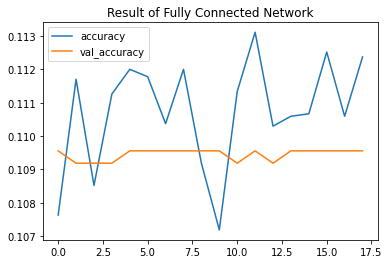

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
plt.title("Result of Fully Connected Network")

Minimum validation loss: 2.2948193550109863


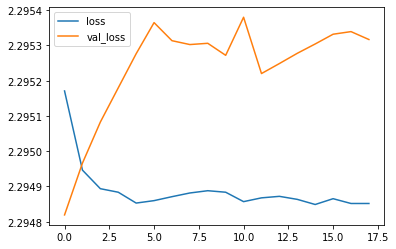

In [112]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

SVC

In [59]:
from sklearn.svm import SVC
svc=SVC()

In [61]:
#train the model
svc.fit(mat_1D_train, y_train)

SVC()

In [62]:
#Training accuracy
y_pred_train = svc.predict(mat_1D_train)

In [63]:
from sklearn.metrics import accuracy_score
print ('Training accuracy =', accuracy_score(y_train, y_pred_train))

Training accuracy = 0.6181481481481481


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1521
           1       0.62      0.89      0.73      1486
           2       0.39      0.30      0.34      1464
           3       0.74      0.39      0.51      1256
           4       0.91      0.94      0.92      1270
           5       0.36      0.62      0.45       972
           6       0.65      0.50      0.56      1262
           7       0.66      0.79      0.72      1468
           8       0.59      0.54      0.57      1275
           9       0.77      0.48      0.59      1526

    accuracy                           0.62     13500
   macro avg       0.63      0.62      0.61     13500
weighted avg       0.64      0.62      0.61     13500



In [65]:
#testing accuracy
y_pred_test = svc.predict(mat_1D_test)

In [66]:
from sklearn.metrics import accuracy_score
print ('Testing accuracy =', accuracy_score(y_test, y_pred_test))

Testing accuracy = 0.4958518518518519


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.57      0.51      1479
           1       0.62      0.87      0.73      1514
           2       0.24      0.18      0.21      1536
           3       0.47      0.19      0.27      1244
           4       0.74      0.85      0.79      1230
           5       0.34      0.59      0.43      1028
           6       0.35      0.25      0.29      1238
           7       0.50      0.53      0.52      1532
           8       0.44      0.43      0.44      1225
           9       0.73      0.48      0.58      1474

    accuracy                           0.50     13500
   macro avg       0.49      0.49      0.48     13500
weighted avg       0.49      0.50      0.48     13500



CNN

In [27]:
#read images without vectorize them
num = X_train.shape[0]
dim_train = np.zeros([num, 64, 64, 3])

#loop
for i, tmpPath in enumerate(X_train.values):
    img_rgb_train = imread(tmpPath)
    dim_train[i, :, :, :] = img_rgb_train

In [28]:
dim_train.shape

(13500, 64, 64, 3)

In [29]:
#read images without vectorize them
num = X_train.shape[0]
dim_test = np.zeros([num, 64, 64, 3])

#loop
for i, tmpPath in enumerate(X_test.values):
    img_rgb_train = imread(tmpPath)
    dim_test[i, :, :, :] = img_rgb_train

In [30]:
dim_test.shape

(13500, 64, 64, 3)

In [31]:
#change labels to categorical
from keras.utils import to_categorical

y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

In [32]:
y_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
#Simple CNN

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [25]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [33]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [34]:
model.fit(dim_train, y_train_labels,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(dim_test, y_test_labels))

Epoch 1/12
106/106 [==============================] - 103s 971ms/step - loss: 25.9513 - accuracy: 0.1189 - val_loss: 2.5726 - val_accuracy: 0.2006
Epoch 2/12
106/106 [==============================] - 111s 1s/step - loss: 5.9322 - accuracy: 0.1201 - val_loss: 2.3034 - val_accuracy: 0.1144
Epoch 3/12
106/106 [==============================] - 111s 1s/step - loss: 2.8681 - accuracy: 0.1242 - val_loss: 2.3029 - val_accuracy: 0.1093
Epoch 4/12
106/106 [==============================] - 113s 1s/step - loss: 2.4866 - accuracy: 0.1233 - val_loss: 2.3026 - val_accuracy: 0.1093
Epoch 5/12
106/106 [==============================] - 109s 1s/step - loss: 2.3760 - accuracy: 0.1206 - val_loss: 2.3026 - val_accuracy: 0.1092
Epoch 6/12
106/106 [==============================] - 101s 952ms/step - loss: 2.3506 - accuracy: 0.1173 - val_loss: 2.3026 - val_accuracy: 0.1092
Epoch 7/12
106/106 [==============================] - 103s 968ms/step - loss: 2.3366 - accuracy: 0.1156 - val_loss: 2.3025 - val_accura

In [35]:
score = model.evaluate(dim_test, y_test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2938642501831055
Test accuracy: 0.13511110842227936
